## **Detecting Financial Crimes and Money Laundering**
In today’s world, banks have become well integrated into the technological era. This significant shift created an easy way of securing and monitoring money. Conversely, the transition provided a gateway for cyber criminals to target account holders of any bank. There are many transgressions that fall under financial crimes, however his project will focus on *Money Laundering*, which is defined by the federal government as the willingness to engage in illegal activity, which provides monetary value, and disguises assets as legal sources of income (U.S. Treasury, n.d.). The primary objective of this research is “How can we accurately detect fraudulent activity in regards to money laundering?”

#### **History**

Prior to uncovering such a prevalent issue, it is important to understand the origins of this type of financial crime. To launder money was to find some means of concealing one’s source of income and disguising it as something legal (FCA 2025). In doing so, this allowed illegal activity to happen under government regimes, and made it almost impossible to catch. The most notable timeframe in which money laundering played a big role in the history of the United States, was during the Prohibition era (FCA 2025). During this timeframe, the use of drinking alcoholic beverages was protested by mainly religious organizations as a way to revitalize the ‘ill parts’ of society (Britannica 2025). There is still uncertainty as to why alcohol was believed to resolve such societal issues, but what is known is that congress banned the consumption of alcohol. 

This consequently led to the most elaborate organized crime schemes in the United States, where mobsters distributed alcohol under the table. Concurrently, these small groups formed gangs hiring lawyers and accountants to hide their illegal activity (Roos, n.d.). This being the start of how money laundering integrated in the U.S. today. The amount of income from these organized groups funded hotels, casinos, and ultimately the black market (Roos, n.d.). In current times, this level of financial crime no longer exists given the changes within society and technological advancement. Although, attempts are still being made and now have become much more sophisticated to investigate. 

#### **Data**
The data being used in this research comes from the open source website [Kaggle](https://www.kaggle.com/). Within this site, there were several suitable datasets, however, the one chosen for this project was created by Erik Altman, [IBM Transactions for Anti Money Laundering (AML)](https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml). He had created a virtual world reflective of the society and its entities (Altman 2021). The idea of this synthetic data is to simulate the different possibilities of money laundering, while also being able to confidently code the true successes of transactional fraud.

In [ ]:
import pandas as pd

accounts = pd.read_csv('Files_CSV/HI-Small_accounts.csv')
transactions = pd.read_csv('Files_CSV/HI-Small_Trans.csv')

#### *HI-Small_accounts.csv*
Contains a total of 518,581 rows, which are representative of all the accounts utilized in the simulated transactions data. Since the simulation is reflective of society, this dataset also has 501 banks. Each bank has any number of accounts utilized under their bank, as well as any number of branching banks with the same name. However, the *HI-Small_accounts.csv* does encrypt each bank entity itself with a specialized number to distinguish it from other branching bank entities. In doing this, it does lead a significant number of null values when splitting the banks from their specialized number. In contrast, this does not effect the dataset in any way, as it is a column there for assessing the relationships of each feature. Lastly, the data also contains the account type, also known as the reasoning for the existence of such an account. There are only 6 types: *Sole Proprietorship*, *Corporation*, *Partnership*, *Country*, *Individual*, and *Direct*.

In [11]:
# Split Columns
accounts[['Bank Name (2)', 'Bank Name (3)']] = accounts['Bank Name'].str.split('#', n=1, expand=True)
accounts[['Entity Name (2)', 'Entity Name (3)']] = accounts['Entity Name'].str.split('#', n=1, expand=True)

print(f'Total Rows/Accounts: {len(accounts)}')
print(f'Total Banks: {len(accounts['Bank Name (2)'].drop_duplicates())}')
print(f'Total Entities: {len(accounts['Entity Name (2)'].drop_duplicates())}')
print()
print(accounts.isna().sum())

Total Rows/Accounts: 518581
Total Banks: 501
Total Entities: 6

Bank Name               0
Bank ID                 0
Account Number          0
Entity ID               0
Entity Name             0
Bank Name (2)           0
Bank Name (3)      201080
Entity Name (2)         0
Entity Name (3)         0
dtype: int64


#### *HI-Small_Trans.csv*
This dataset consists of all the transactions in a simulated world of 18 days. It has 5,078,345 total transactions, which is a mixture of all accounts from the *HI-Small_accounts.csv*. In terms of fraud detection, *Is Laundering* is the column at hand for testing. It is a boolean variable coded as True (1) or False (0). From this data, there is a total of 5,177 fraudulent transactions, this being about 0.1% of the total data. In light of this, it creates challenges of optimizing predictive modeling. Nevertheless, these datasets are highly reflective of how ingrained and difficult catching money laundering schemes are.

In [14]:
count_ML = len(transactions[transactions['Is Laundering'] == 1])
count_Trans = len(transactions)

print('HI-Small_Trans.csv')
print(f'Total Rows: {count_Trans}')
print(f'Total Laundering: {count_ML}')
print(f'Percent of Laundering: {(count_ML/count_Trans)*100:.1f}%')
print()
print(transactions.isna().sum())

HI-Small_Trans.csv
Total Rows: 5078345
Total Laundering: 5177
Percent of Laundering: 0.1%

Timestamp             0
From Bank             0
Acc. Orig.            0
To Bank               0
Acc. End              0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


#### **Standardizing & Normalize**
- Clarifying matching column names
- Turning columns into respective data types
- Feature Engineering (Refer to Discovery.ipynb)
    - Create boolean value columns
    - Focus will be on receiving banks and their respective accounts
- Drop Columns

*Will write in detail later

In [36]:
# Column Names Change
transactions.rename(columns={'Account': 'Acc. Orig.', 'Account.1': 'Acc. End'}, inplace=True)

# Standardization
col_to_int = ['From Bank', 'To Bank', 'Is Laundering']
col_to_float = ['Amount Received', 'Amount Paid']
transactions[col_to_int] = transactions[col_to_int].astype(int)
transactions[col_to_float] = transactions[col_to_float].astype(float)
transactions['Timestamp'] = pd.to_datetime(transactions['Timestamp'])

# Fraudulent vs Non-Fraudulent
fraud_true = transactions[transactions['Is Laundering'] == 1]

# 'IS_ACH' Payment Format
transactions['Is ACH'] = transactions['Payment Format'] == 'ACH'

# 'To/From Bank' Difference
transactions['T/F Bank Diff'] = transactions['To Bank'] != transactions['From Bank']

# Suspicious To Banks
list_sus_banks = fraud_true['To Bank'].drop_duplicates().tolist()
transactions['Sus. Bank'] = transactions['To Bank'].isin(list_sus_banks)

# Suspicious End Accounts
list_sus_acc = fraud_true['Acc. End'].drop_duplicates().tolist()
transactions['Sus. Acc.'] = transactions['Acc. End'].isin(list_sus_acc)

# Drop Uneccessary Columns
col_drop = ['Timestamp', 'From Bank', 'Acc. Orig.', 
            'To Bank', 'Acc. End', 'Receiving Currency', 
            'Amount Paid', 'Payment Currency', 'Payment Format']
transactions.drop(columns=col_drop, inplace=True, axis=1)
transactions

,Amount Received,Is Laundering,Is ACH,T/F Bank Diff,Sus. Bank,Sus. Acc.
0,3697.340000,0,False,False,True,False
1,0.010000,0,False,True,True,False
2,14675.570000,0,False,False,False,False
3,2806.970000,0,False,False,True,True
4,36682.970000,0,False,False,True,False
...,...,...,...,...,...,...
5078340,0.154978,0,False,True,False,False
5078341,0.108128,0,False,True,False,False
5078342,0.004988,0,False,True,False,False
5078343,0.038417,0,False,False,False,False


## **Random Forest Modeling**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = transactions.drop('Is Laundering', axis=1)
y = transactions['Is Laundering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model2 = RandomForestClassifier(n_estimators=50, random_state=5, class_weight='balanced')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1521902
           1       0.27      0.39      0.32      1602

    accuracy                           1.00   1523504
   macro avg       0.64      0.70      0.66   1523504
weighted avg       1.00      1.00      1.00   1523504

[[1520243    1659]
 [    974     628]]


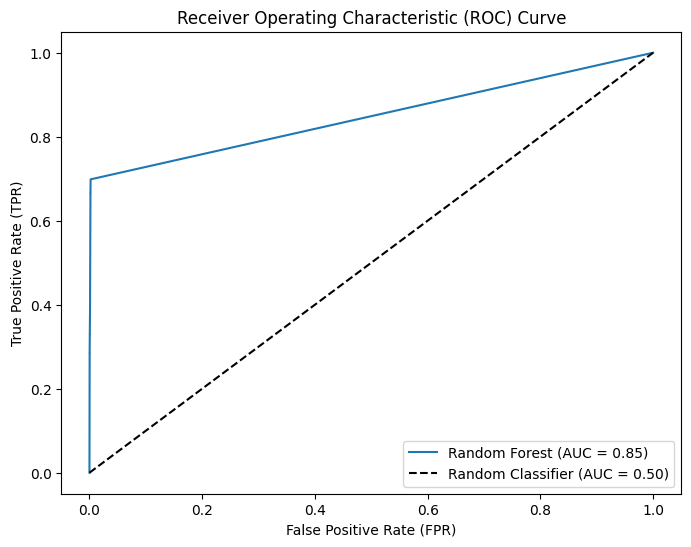

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model2.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **Ending Results**
Comparatively, results from the classification report have increased significantly since the first attempt containing no feature engineering. The same can be said for the confusion matrix. In terms of the ROC curve, feature engineering only increased by 0.06 making it not a significant increase.

#### **References**

Altman, E. (2021). IBM transactions for anti-money laundering (AML) [Data set]. Kaggle. https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml

The Editors of Encyclopaedia Britannica. (2024, September 13). Prohibition: United States history [1920–1933]. Encyclopedia Britannica. https://www.britannica.com/event/Prohibition-United-States-history-1920-1933

Financial Crime Academy. (n.d.). The history of money laundering. https://financialcrimeacademy.org/the-history-of-money-laundering-2/

The HISTORY.com Editors. (2023, June 7). How Prohibition fueled the rise of the American mob. HISTORY. https://www.history.com/articles/prohibition-organized-crime-al-capone

U.S. Department of the Treasury. (2021, November 29). Money laundering. https://home.treasury.gov/policy-issues/terrorism-and-illicit-finance/money-laundering